Step1: Compare Hum1(SEB) and Hum2(SEB) performances 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data and fix missing values
file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

hum_sheets = ['Hum1', 'Hum2']
dfs_hum = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in hum_sheets}

numeric_cols = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

for name, df in dfs_hum.items():
    print(f"Missing values in {name} before filling:")
    print(df[numeric_cols].isna().sum())
    print("\n")

dfs_hum['Hum1'][numeric_cols] = dfs_hum['Hum1'][numeric_cols].fillna(dfs_hum['Hum1'][numeric_cols].mean())

for name, df in dfs_hum.items():
    print(f"Missing values in {name} after filling (Hum2 should be intact):")
    print(df[numeric_cols].isna().sum())
    print("\n")

Missing values in Hum1 before filling:
accuracy_score        11
efficiency_score      11
politeness_score      11
trust_score           11
satisfaction_score    11
risk_flag             11
token_count           11
dtype: int64


Missing values in Hum2 before filling:
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum1 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum2 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64




In [ ]:
# descriptive statistics for Hum1 and Hum2
hum1_df = dfs_hum['Hum1']
hum2_df = dfs_hum['Hum2']

hum1_stats = hum1_df[numeric_cols].agg(['mean','std','min','max'])
hum2_stats = hum2_df[numeric_cols].agg(['mean','std','min','max'])

print("Hum1 descriptive statistics:")
print(hum1_stats)
print("\nHum2 descriptive statistics:")
print(hum2_stats)

Hum1 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        0.812500               5.0          2.000000     1.937500   
std         0.413126               0.0          0.733799     0.705405   
min         0.000000               5.0          1.000000     1.000000   
max         2.000000               5.0          4.000000     4.000000   

      satisfaction_score  risk_flag  token_count  
mean            2.375000   0.750000    23.400000  
std             0.995181   0.339683    13.232914  
min             1.000000   0.000000     1.300000  
max             5.000000   1.000000    62.400000  

Hum2 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        1.666667           3.37037          4.185185     4.518519   
std         0.554700           0.92604          0.483341     0.509175   
min         0.000000           1.00000          3.000000     4.000000   
max         2.000000        

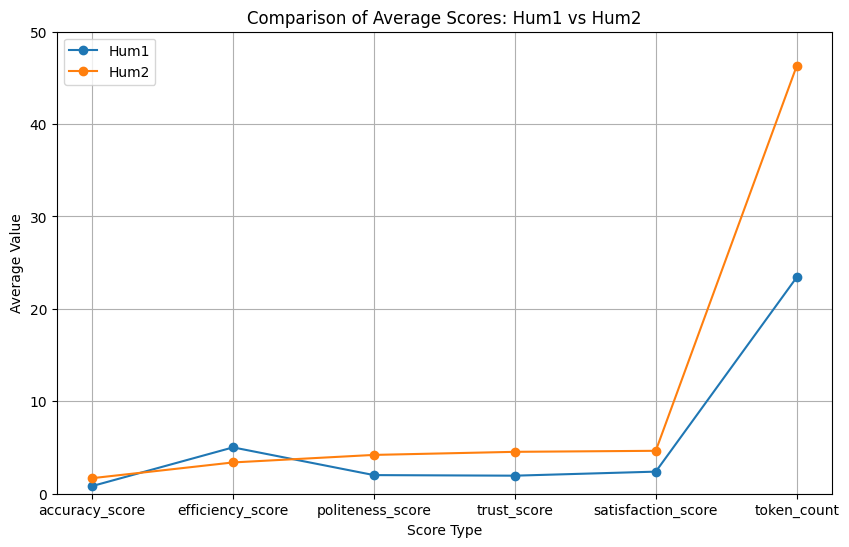

In [17]:
# Line plot comparison for Hum1 vs Hum2 scores
score_cols = ['accuracy_score','efficiency_score','politeness_score','trust_score','satisfaction_score', 'token_count']

hum1_means = hum1_df[score_cols].mean()
hum2_means = hum2_df[score_cols].mean()

plt.figure(figsize=(10,6))
plt.plot(score_cols, hum1_means, marker='o', label='Hum1')
plt.plot(score_cols, hum2_means, marker='o', label='Hum2')
plt.title('Comparison of Average Scores: Hum1 vs Hum2')
plt.xlabel('Score Type')
plt.ylabel('Average Value')
plt.ylim(0,50)
plt.grid(True)
plt.legend()
plt.show()

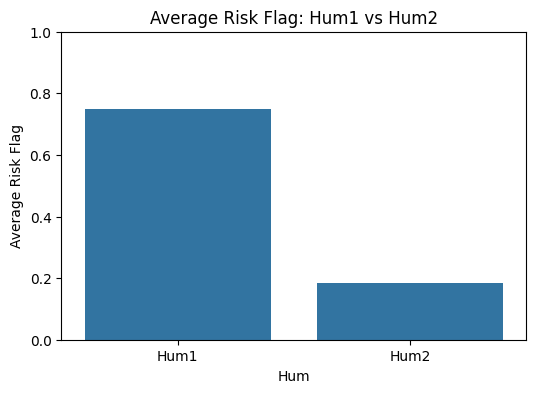

In [ ]:
#barplot for average risk_flag
risk_avg = pd.DataFrame({
    'Hum': ['Hum1','Hum2'],
    'Average Risk': [hum1_df['risk_flag'].mean(), hum2_df['risk_flag'].mean()]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Hum', y='Average Risk', data=risk_avg)
plt.title('Average Risk Flag: Hum1 vs Hum2')
plt.ylabel('Average Risk Flag')
plt.ylim(0,1)
plt.show()

Step2: compare deepseek(web) 0(lengthy) & deepseek(web) 1(simplified)
               gpt-oss120b 0(lengthy) & gpt-oss120b 1(simplied)
               llama3:8b 0(lengthy) & llama3:8b 1(simplified)

In [ ]:
# Descriptive statistics for LLMs: Deep0, Deep1, Gpt0, Gpt1, Llama0, Llama1
LLM_sheets = ['Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in LLM_sheets}

numeric_cols1 = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

for name, df in dfs.items():
    print(f"--- {name} Descriptive Statistics ---")
    stats = df[numeric_cols1].describe().transpose() 
    print(stats.to_string())
    print("\n")

--- Deep0 Descriptive Statistics ---
                    count        mean        std   min    25%    50%    75%    max
accuracy_score       27.0    2.000000   0.000000   2.0   2.00    2.0    2.0    2.0
efficiency_score     27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
politeness_score     27.0    4.370370   0.492103   4.0   4.00    4.0    5.0    5.0
trust_score          27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
satisfaction_score   27.0    4.666667   0.480384   4.0   4.00    5.0    5.0    5.0
risk_flag            27.0    0.000000   0.000000   0.0   0.00    0.0    0.0    0.0
token_count          27.0  110.259259  31.283299  40.3  87.75  117.0  127.4  184.6


--- Deep1 Descriptive Statistics ---
                    count       mean       std  min    25%   50%   75%   max
accuracy_score       27.0   1.962963  0.192450  1.0   2.00   2.0   2.0   2.0
efficiency_score     27.0   4.962963  0.192450  4.0   5.00   5.0   5.0   5.0
politeness_score     27.0   4

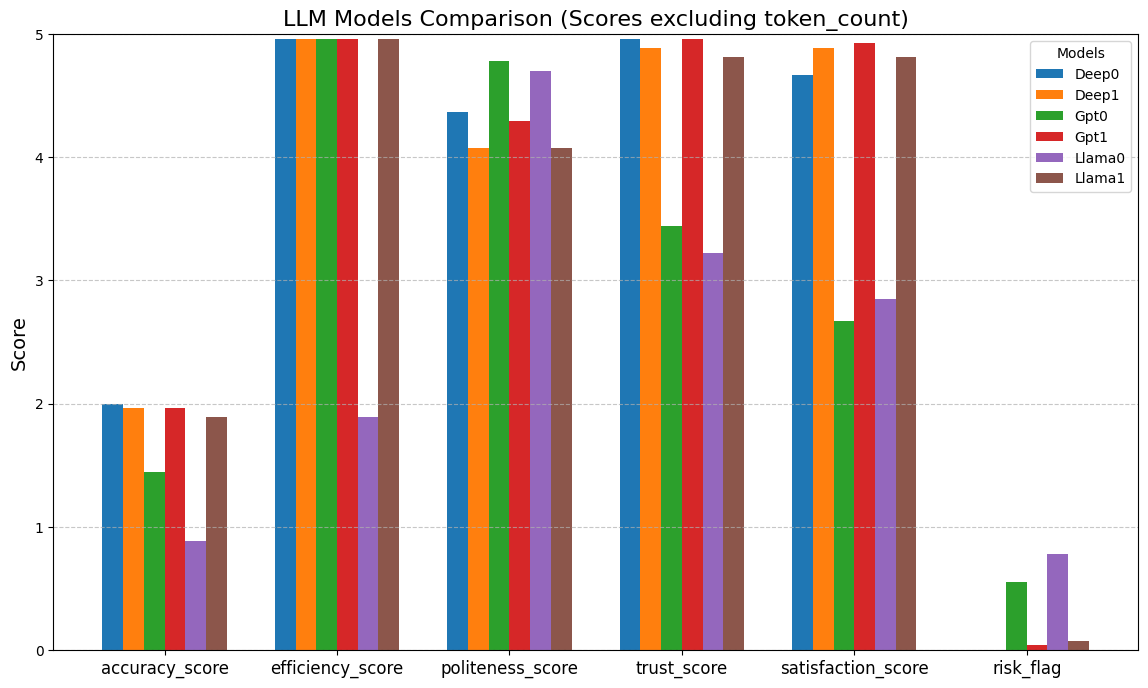

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

means_dict = {}
for name, df in dfs.items():
    temp = df[numeric_cols1].mean()
    means_dict[name] = temp  
means_df = pd.DataFrame(means_dict).T 
means_df = means_df.drop(columns=['token_count']) 

scores = means_df.columns
models = means_df.index
x = np.arange(len(scores)) 
width = 0.12  

plt.figure(figsize=(14, 8))
for i, model in enumerate(models):
    plt.bar(x + i*width, means_df.loc[model], width=width, label=model)

plt.xticks(x + width*(len(models)/2 - 0.5), scores, fontsize=12)
plt.ylim(0, 5)
plt.ylabel("Score", fontsize=14)
plt.title("LLM Models Comparison (Scores excluding token_count)", fontsize=16)
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

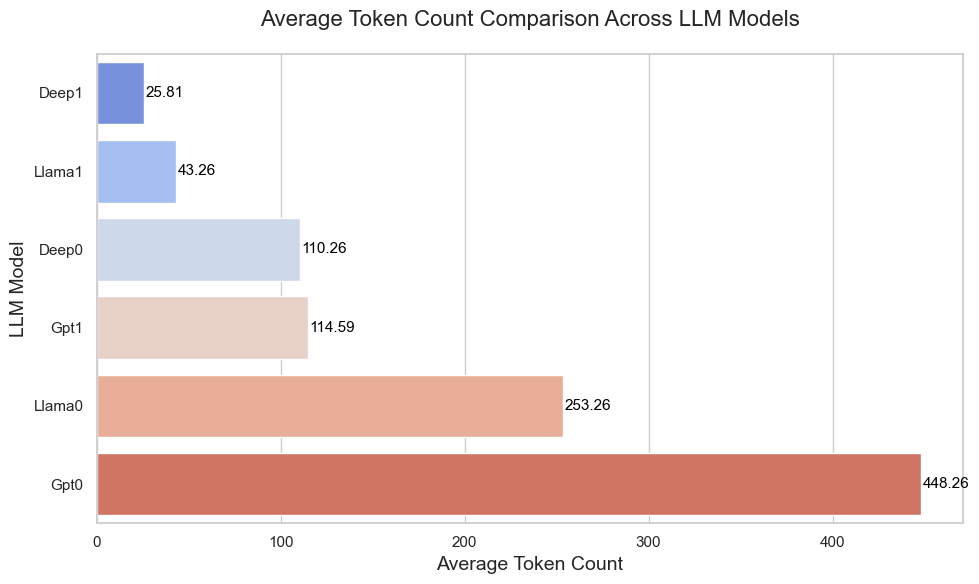

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

token_means = {name: df['token_count'].mean() for name, df in dfs.items()}
token_df = pd.DataFrame(list(token_means.items()), columns=['Model', 'Average_Token_Count'])
token_df = token_df.sort_values(by='Average_Token_Count', ascending=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=token_df,
    x='Average_Token_Count',
    y='Model',
    hue='Model',         
    palette='coolwarm',
    legend=False         
)

for index, value in enumerate(token_df['Average_Token_Count']):
    plt.text(value + 1, index, f"{value:.2f}", va='center', fontsize=11, color='black')

plt.title("Average Token Count Comparison Across LLM Models", fontsize=16, pad=20)
plt.xlabel("Average Token Count", fontsize=14)
plt.ylabel("LLM Model", fontsize=14)

plt.tight_layout()
plt.show()

Step3: Compare Hum1&2 and LLMs Accuracy

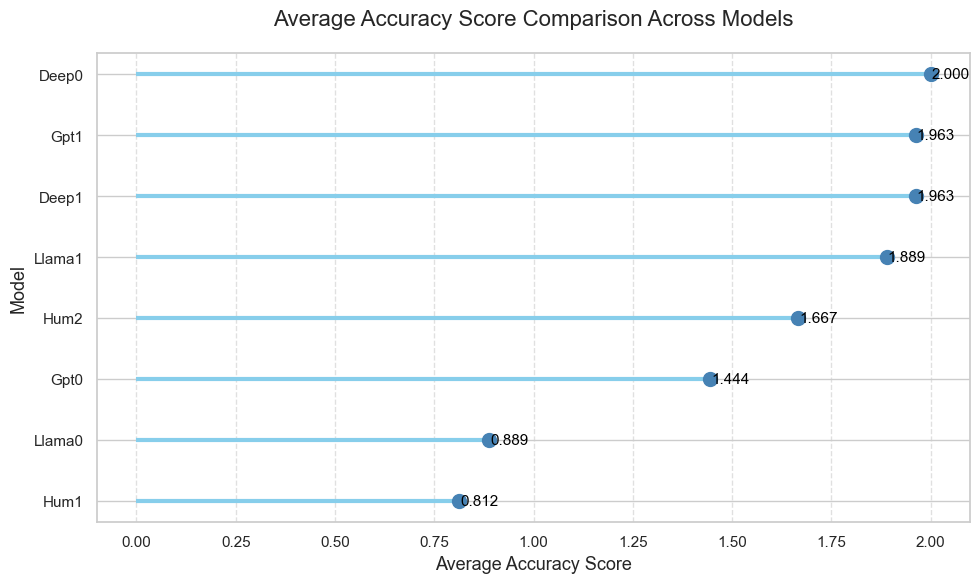

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets = ['Hum1', 'Hum2', 'Deep0', 'Deep1', 'Gpt0', 'Gpt1', 'Llama0', 'Llama1']

dfs1 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

hum1_df = dfs1['Hum1']
hum1_df['accuracy_score'] = hum1_df['accuracy_score'].fillna(hum1_df['accuracy_score'].mean())
dfs1['Hum1'] = hum1_df

mean_accuracy = {name: df['accuracy_score'].mean() for name, df in dfs1.items()}

acc_df = pd.DataFrame(list(mean_accuracy.items()), columns=['Model', 'Average_Accuracy'])
acc_df = acc_df.sort_values(by='Average_Accuracy', ascending=True)

# Lollipop plot
plt.figure(figsize=(10, 6))
plt.hlines(y=acc_df['Model'], xmin=0, xmax=acc_df['Average_Accuracy'], color='skyblue', linewidth=3)
plt.plot(acc_df['Average_Accuracy'], acc_df['Model'], "o", markersize=10, color='steelblue')

for index, value in enumerate(acc_df['Average_Accuracy']):
    plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=11, color='black')

plt.title("Average Accuracy Score Comparison Across Models", fontsize=16, pad=20)
plt.xlabel("Average Accuracy Score", fontsize=13)
plt.ylabel("Model", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Step3: compare Hum1&Hum2 and LLMs Efficiency & Token

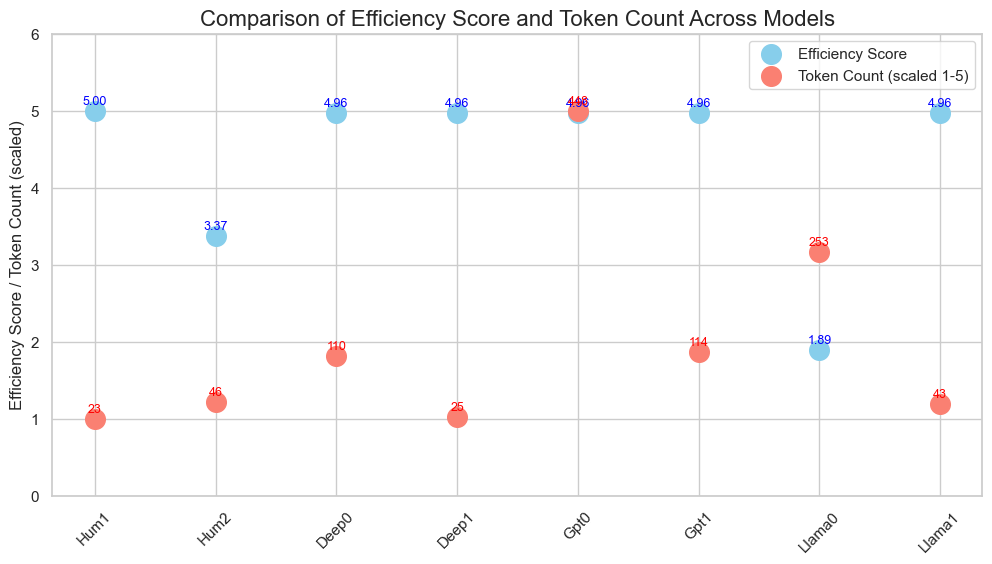

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets2= ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs2 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets2}

numeric_cols2 = ['efficiency_score','token_count']

dfs2['Hum1'][numeric_cols2] = dfs2['Hum1'][numeric_cols2].fillna(dfs2['Hum1'][numeric_cols2].mean())

means = {}
for name, df in dfs2.items():
    means[name] = df[numeric_cols2].mean()

means_df = pd.DataFrame(means).T.reset_index()
means_df = means_df.rename(columns={'index':'Model'})

token_min = means_df['token_count'].min()
token_max = means_df['token_count'].max()
means_df['token_count_scaled'] = 1 + 4*(means_df['token_count'] - token_min)/(token_max - token_min)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.scatter(means_df['Model'], means_df['efficiency_score'], s=200, color='skyblue', label='Efficiency Score')
plt.scatter(means_df['Model'], means_df['token_count_scaled'], s=200, color='salmon', label='Token Count (scaled 1-5)')

for i, row in means_df.iterrows():
    plt.text(row['Model'], row['efficiency_score']+0.05, f"{row['efficiency_score']:.2f}", 
             ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(row['Model'], row['token_count_scaled']+0.05, f"{int(row['token_count'])}", 
             ha='center', va='bottom', fontsize=9, color='red')

plt.ylim(0,6)
plt.ylabel("Efficiency Score / Token Count (scaled)")
plt.title("Comparison of Efficiency Score and Token Count Across Models", fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Step4:Compare Politeness of 2 human agents and 6 LLMs

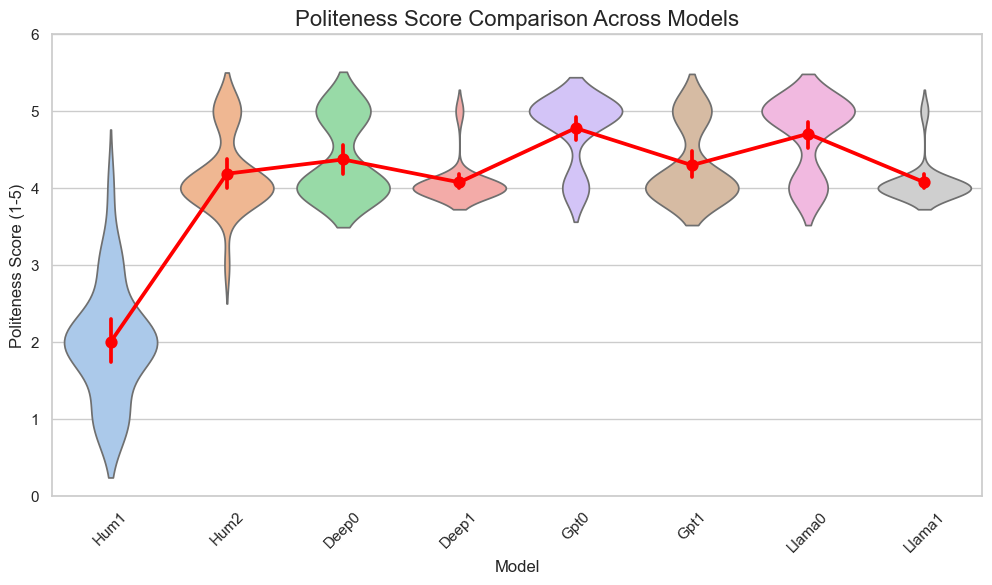

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets3 = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs3 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets3}

dfs3['Hum1']['politeness_score'] = dfs3['Hum1']['politeness_score'].fillna(dfs3['Hum1']['politeness_score'].mean())

politeness_data = []
for name, df in dfs3.items():
    temp = df[['politeness_score']].copy()
    temp['Model'] = name
    politeness_data.append(temp)

politeness_df = pd.concat(politeness_data, ignore_index=True)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Violin plot 
sns.violinplot(x='Model', y='politeness_score', data=politeness_df, inner=None, palette='pastel', hue='Model', legend=False)
sns.pointplot(x='Model', y='politeness_score', data=politeness_df, estimator=np.mean, color='red', markers='o')

plt.title("Politeness Score Comparison Across Models", fontsize=16)
plt.ylabel("Politeness Score (1-5)")
plt.ylim(0,6)
plt.xticks(rotation=45)
plt.show()


Step5: Research on how trust_score is affected by politeness_score, and accuracy_score among 8 agents